In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

%matplotlib inline

- https://www.suche-postleitzahl.org/downloads
- http://geopandas.org/mapping.html
- https://worldpostalcode.com/germany/berlin
- https://gist.github.com/jbspeakr/4565964

In [2]:
plz_shape_df = gpd.read_file('../Data/plz-gebiete.shp', dtype={'plz': str})

plz_shape_df.head()

,plz,note,geometry
0,52538,"52538 Gangelt, Selfkant","POLYGON ((5.86632 51.05110, 5.86692 51.05124, ..."
1,47559,47559 Kranenburg,"POLYGON ((5.94504 51.82354, 5.94580 51.82409, ..."
2,52525,"52525 Waldfeucht, Heinsberg","POLYGON ((5.96811 51.05556, 5.96951 51.05660, ..."
3,52074,52074 Aachen,"POLYGON ((5.97486 50.79804, 5.97495 50.79809, ..."
4,52531,52531 Ãbach-Palenberg,"POLYGON ((6.01507 50.94788, 6.03854 50.93561, ..."


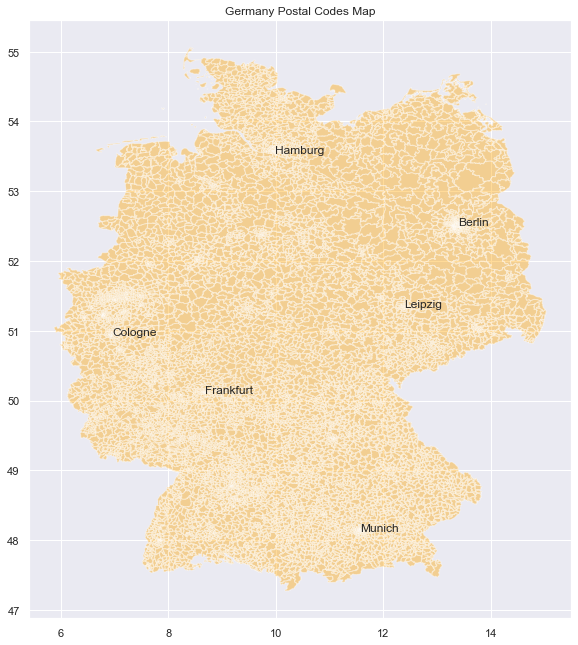

In [3]:
plt.rcParams['figure.figsize'] = [16, 11]

top_cities = {
    'Berlin': (13.404954, 52.520008), 
    'Cologne': (6.953101, 50.935173),
    'Frankfurt': (8.682127, 50.110924),
    'Hamburg': (9.993682, 53.551086),
    'Leipzig': (12.387772, 51.343479),
    'Munich': (11.576124, 48.137154),
}

fig, ax = plt.subplots()

plz_shape_df.plot(ax=ax, color='orange', alpha=0.4)

for c in top_cities.keys():
    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1], 
        s=c, 
        fontsize=12
    )

ax.set(title='Germany Postal Codes Map', aspect=1.3);

In [4]:
plz_shape_df = plz_shape_df \
    .assign(first_dig_plz = lambda x: x['plz'].str.slice(start=0, stop=1))

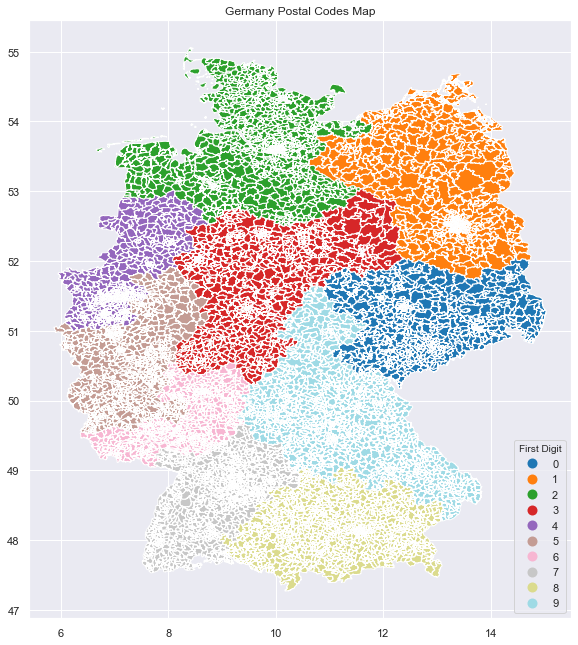

In [5]:
fig, ax = plt.subplots()

plz_shape_df.plot(
    ax=ax, 
    column='first_dig_plz', 
    categorical=True, 
    legend=True, 
    legend_kwds={'title':'First Digit', 'loc':'lower right'},
    cmap='tab20',
)

ax.set(
    title='Germany Postal Codes Map', 
    aspect=1.3
);

In [6]:
plz_region_df = pd.read_csv('../Data/German-Zip-Codes.csv', sep=';', dtype={'Plz': str})

plz_region_df = plz_region_df[['Plz', 'Ort', 'Bundesland']]

plz_region_df.head()

,Plz,Ort,Bundesland
0,54298,Aach,Rheinland-Pfalz
1,78267,Aach,Baden-Württemberg
2,52062,Aachen,Nordrhein-Westfalen
3,52064,Aachen,Nordrhein-Westfalen
4,52066,Aachen,Nordrhein-Westfalen


In [7]:
germany_df = pd.merge(
    left=plz_shape_df, 
    right=plz_region_df, 
    left_on='plz', 
    right_on='Plz', 
    how='inner'
)

germany_df.drop(['note', 'Plz'], axis=1, inplace=True)

germany_df.head()

,plz,geometry,first_dig_plz,Ort,Bundesland
0,52538,"POLYGON ((5.86632 51.05110, 5.86692 51.05124, ...",5,Gangelt,Nordrhein-Westfalen
1,52538,"POLYGON ((5.86632 51.05110, 5.86692 51.05124, ...",5,Selfkant,Nordrhein-Westfalen
2,47559,"POLYGON ((5.94504 51.82354, 5.94580 51.82409, ...",4,Kranenburg,Nordrhein-Westfalen
3,52525,"POLYGON ((5.96811 51.05556, 5.96951 51.05660, ...",5,Heinsberg,Nordrhein-Westfalen
4,52525,"POLYGON ((5.96811 51.05556, 5.96951 51.05660, ...",5,Waldfeucht,Nordrhein-Westfalen


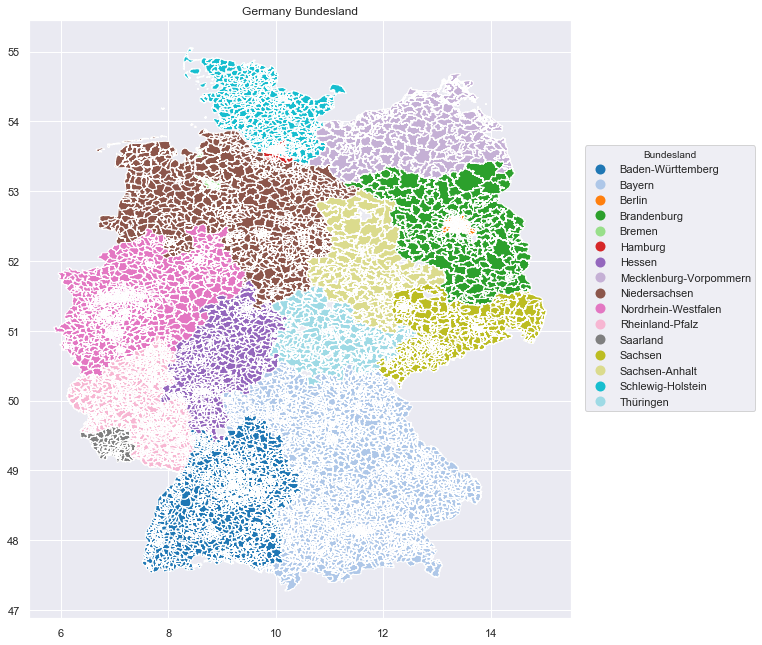

In [8]:
fig, ax = plt.subplots()

germany_df.plot(
    ax=ax, 
    column='Bundesland', 
    categorical=True, 
    legend=True, 
    legend_kwds={'title':'Bundesland', 'bbox_to_anchor': (1.35, 0.8)},
    cmap='tab20',
)

ax.set(
    title='Germany Bundesland', 
    aspect=1.3
);

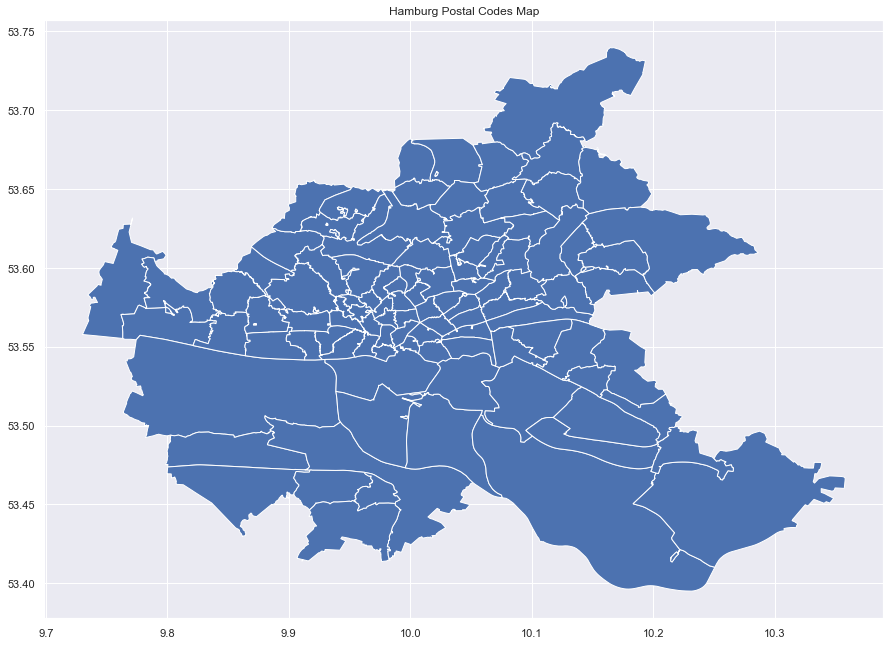

In [9]:
hamburg_df = germany_df.query('Ort == "Hamburg"')

fig, ax = plt.subplots()

hamburg_df.plot(ax=ax)

ax.set(title='Hamburg Postal Codes Map', aspect=1.3);

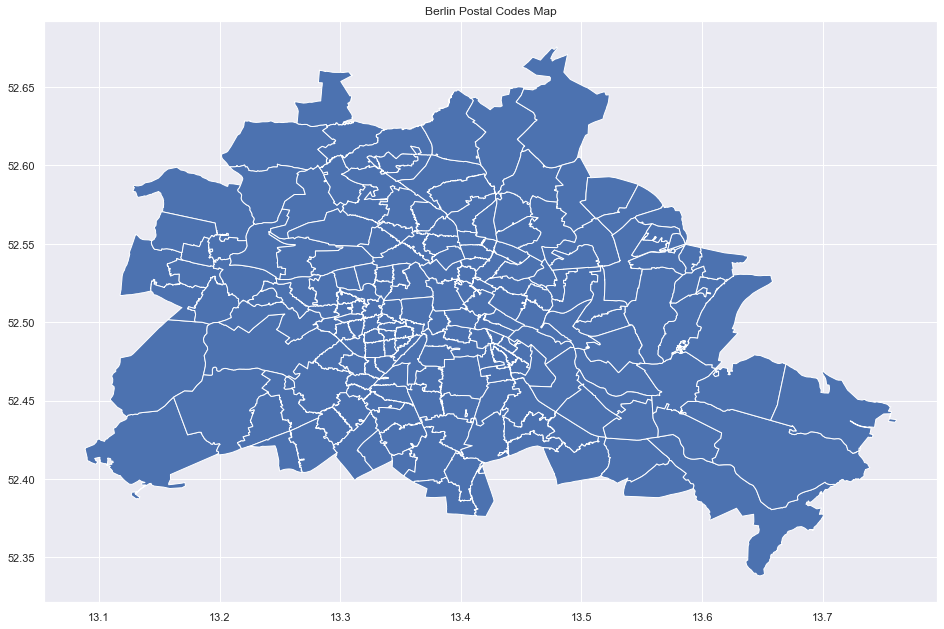

In [10]:
berlin_df = germany_df.query('Ort == "Berlin"')

fig, ax = plt.subplots()

berlin_df.plot(ax=ax)

ax.set(title='Berlin Postal Codes Map', aspect=1.3);

https://www.statistik-berlin-brandenburg.de/produkte/verzeichnisse/ZuordnungderBezirkezuPostleitzahlen.xls

In [11]:
berlin_plz_area_df = pd.read_excel(
    '../Data/ZuordnungderBezirkezuPostleitzahlen.xls', 
    sheet_name='plz_bez_tidy',
    dtype={'plz': str}
)

berlin_plz_area_df.head()

,plz,area
0,10115,Mitte
1,10117,Mitte
2,10119,Mitte
3,10178,Mitte
4,10179,Mitte


In [12]:
berlin_plz_area_df \
    [berlin_plz_area_df['plz'].duplicated(keep=False)] \
    .sort_values('plz')

,plz,area
2,10119,Mitte
41,10119,Pankow
4,10179,Mitte
26,10179,Friedrichshain-Kreuzberg
42,10247,Pankow
...,...,...
133,14197,Steglitz-Zehlendorf
95,14197,Charlottenburg-Wilmersdorf
165,14197,Tempelhof-Schöneberg
134,14199,Steglitz-Zehlendorf


http://insideairbnb.com/get-the-data.html

In [13]:
berlin_neighbourhoods_df = gpd.read_file('../Data/neighbourhoods.geojson')

berlin_neighbourhoods_df = berlin_neighbourhoods_df[~ berlin_neighbourhoods_df['neighbourhood_group'].isnull()]

berlin_neighbourhoods_df.head()

,neighbourhood,neighbourhood_group,geometry
0,Blankenfelde/Niederschönhausen,Pankow,"MULTIPOLYGON (((13.41191 52.61487, 13.41183 52..."
1,Helmholtzplatz,Pankow,"MULTIPOLYGON (((13.41405 52.54929, 13.41422 52..."
2,Wiesbadener Straße,Charlottenburg-Wilm.,"MULTIPOLYGON (((13.30748 52.46788, 13.30743 52..."
3,Schmöckwitz/Karolinenhof/Rauchfangswerder,Treptow - Köpenick,"MULTIPOLYGON (((13.70973 52.39630, 13.70926 52..."
4,Müggelheim,Treptow - Köpenick,"MULTIPOLYGON (((13.73762 52.40850, 13.73773 52..."


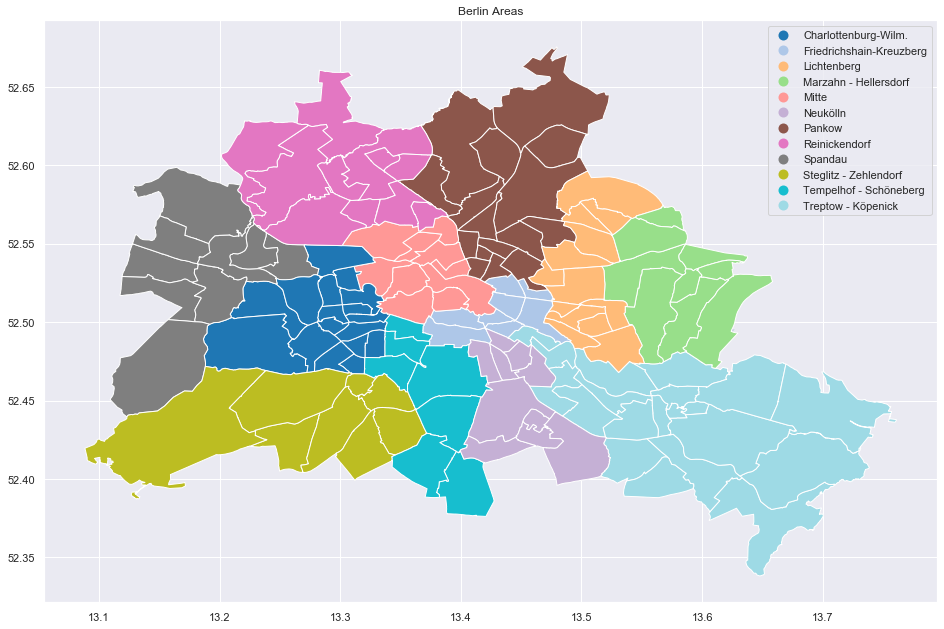

In [14]:
fig, ax = plt.subplots()

berlin_df.plot(
    ax=ax, 
    alpha=0.2
)

berlin_neighbourhoods_df.plot(
    ax=ax, 
    column='neighbourhood_group',
    categorical=True, 
    legend=True, 
    cmap='tab20',
)

ax.set(
    title='Berlin Areas', 
    aspect=1.3
);

https://daten.berlin.de/datensaetze/berliner-weihnachtsmärkte-2019

In [15]:
import requests

response = requests.get(
    'https://www.berlin.de/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/index/all.json?q='
)

response_json = response.json()

In [16]:
berlin_maerkte_raw_df = pd.DataFrame(response_json['index'])

berlin_maerkte_raw_df.head()

,id,name,bezirk,strasse,plz_ort,veranstalter,von,bis,oeffnungszeiten,email,w3,bemerkungen,lat,lng
0,2,Weihnachtsmarkt vor dem Schloss Charlottenburg,Charlottenburg-Wilmersdorf,Spandauer Damm 20 - 24,14059 Berlin,"WeBe Veranstaltungsmanagement GmbH & Co. KG, G...",2019-11-25,2019-12-26,Mo-Do 14:00-22:00\r\nFr-So 12:00-22:00\r\n25./...,,www.wvdsc.de,"zwischen Luisenplatz und Klausenerplatz, 24.12...","52,519951","13,295946"
1,5,36. Weihnachtsmarkt an der Gedächtniskirche,Charlottenburg-Wilmersdorf,Breitscheidplatz,10789 Berlin,Arbeitsgemeinschaft City e.V.\r\nBudapester St...,2019-11-25,2020-01-05,So-Do 11:00-21:00\r\nFr-Sa 11:00-22:00\r\n24.1...,mailto:info@svbev.de,www.schaustellerverband-berlin.de,"Eintritt frei, \n31.12.: 10:00 Gottesdienst, 3...","52,504886","13,335511"
2,8,Weihnachtsmarkt in der Fußgängerzone Wilmersdo...,Charlottenburg-Wilmersdorf,Wilmersdorfer Straße,10627 Berlin,"A. Lauenburger, Tel.: 0163/495 77 62",2019-11-26,2019-12-28,täglich 11:00-21:00\r\nSo 13:00-19:00\n24.12.:...,mailto:lauenburger-pony@gmx.de,,,"52,509313","13,305994"
3,11,Weihnachten in Westend,Charlottenburg-Wilmersdorf,Preußenallee,14052 Berlin,"Family & Friends e. V.\r\nTel.: 305 55 21, Fax...",2019-12-21,2019-12-22,12:00-20:00,mailto:stadtkultur@family-and-friends-eV.de,www.family-and-friends-eV.de,Eintritt frei. Das weihnachtliche Rüsseltier i...,"52,512538","13,259213"
4,14,Weihnachtsmarkt Berlin-Grunewald des Johannisc...,Charlottenburg-Wilmersdorf,Bismarckallee 23,14193 Berlin,Johannisches Sozialwerk e.V.\r\nTel.: 89 68 80...,2019-11-29,2019-12-01,Fr 16:00-20:00\r\nSa 14:00-20:00\r\nSo 12:00-1...,,www.johannisches-sozialwerk.de,Weitere Informationen auf der Webseite,"52,48835","13,27725"


In [17]:
berlin_maerkte_df = berlin_maerkte_raw_df[['name', 'bezirk', 'plz_ort', 'lat', 'lng']]

berlin_maerkte_df = berlin_maerkte_df \
    .query('lat != ""') \
    .assign(plz = lambda x: x['plz_ort'].str.split(' ').apply(lambda x: x[0]).astype(str)) \
    .drop('plz_ort', axis=1)

berlin_maerkte_df.head()

,name,bezirk,lat,lng,plz
0,Weihnachtsmarkt vor dem Schloss Charlottenburg,Charlottenburg-Wilmersdorf,"52,519951","13,295946",14059
1,36. Weihnachtsmarkt an der Gedächtniskirche,Charlottenburg-Wilmersdorf,"52,504886","13,335511",10789
2,Weihnachtsmarkt in der Fußgängerzone Wilmersdo...,Charlottenburg-Wilmersdorf,"52,509313","13,305994",10627
3,Weihnachten in Westend,Charlottenburg-Wilmersdorf,"52,512538","13,259213",14052
4,Weihnachtsmarkt Berlin-Grunewald des Johannisc...,Charlottenburg-Wilmersdorf,"52,48835","13,27725",14193


In [18]:
berlin_maerkte_df['lat'] = berlin_maerkte_df['lat'].str.replace(',', '.').astype(float)
berlin_maerkte_df['lng'] = berlin_maerkte_df['lng'].str.replace(',', '.').astype(float)

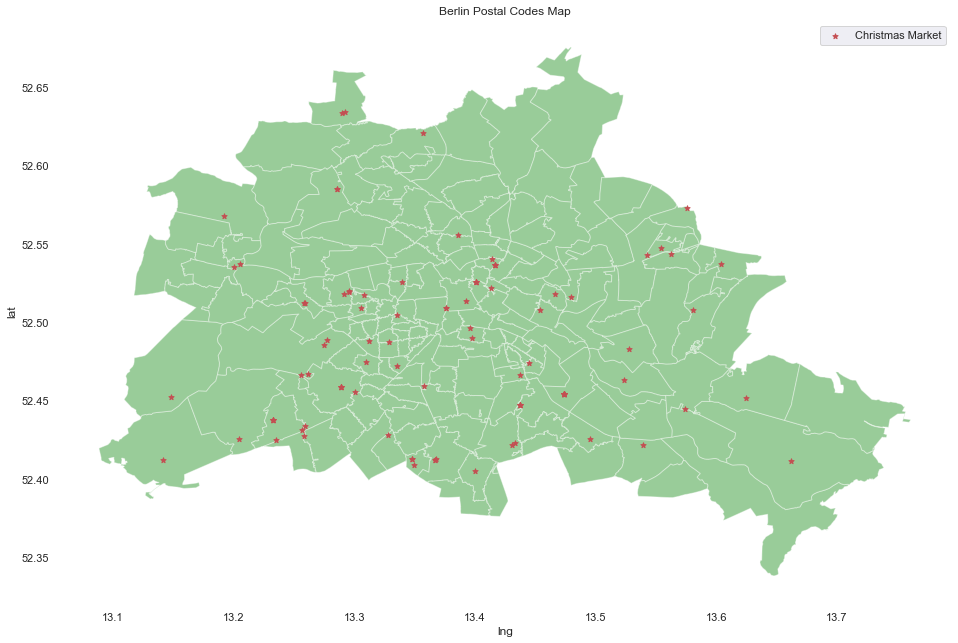

In [19]:
berlin_df = germany_df.query('Ort == "Berlin"')

fig, ax = plt.subplots()

berlin_df.plot(ax=ax, color= 'green', alpha=0.4)

berlin_maerkte_df.plot(
    kind='scatter', 
    x='lng', 
    y='lat', 
    c='r', 
    marker='*',
    s=30,
    label='Christmas Market',  
    ax=ax
)

ax.set(title='Berlin Postal Codes Map', aspect=1.3, facecolor='white');